# Python 3.6 f-Strings

## [mylesb.ca](https://mylesb.ca/) | [me@mylesb.ca](mailto:me@mylesb.ca) | [@mylesb](https://twitter.com/mylesb)

# f-strings are **TOTALLY AWESOME**!

In [1]:
conference = 'PyCon Canada 2018'

f'Hello {conference}!'

'Hello PyCon Canada 2018!'

# I found out about them at PyCon Canada 2017...

# at Mariatta Wijaya keynote.

## They also support expressions inside the `{ }`

In [2]:
f'Hello {conference.upper()}!'

'Hello PYCON CANADA 2018!'

## Even `dict`

In [3]:
portfolio = {'AAPL': 222.77, 'RHT': 122.31, 'GOOGL': 1111.77}

In [4]:
f'${portfolio['GOOGL']}USD'

SyntaxError: invalid syntax (<ipython-input-4-552a7f3505aa>, line 1)

### While that's a little embarrassing...

In [5]:
f"${portfolio['GOOGL']}USD"

'$1111.77USD'

## But look what else you can do...

In [6]:
f"${portfolio['GOOGL']:,}USD"

'$1,111.77USD'

# Hey I heard you like dates and times...

In [7]:
import datetime

NOW = datetime.datetime.now()

f'This notebook was run on {NOW:%d %B %Y} at {NOW:%H:%M}!'

'This notebook was run on 11 November 2018 at 09:07!'

# You can use them in `class`...

In [8]:
class Drink:
    def __init__(self, name, caffine):
        self.name = name
        self.caffine = caffine

    def __str__(self):
        return f'{self.name}'

    def caffine_for_quantity(self, size=100000):
        return (
            f'{self.name} has {self.caffine*size:.0f} '
            f'mg for {size/1000:.0f} grams.'
        )

In [9]:
coffee = Drink('Coffee', .0004)

coffee.caffine_for_quantity()

'Coffee has 40 mg for 100 grams.'

In [10]:
f'{coffee.caffine_for_quantity(459732)}'

'Coffee has 184 mg for 460 grams.'

## and you can use them in pandas

In [14]:
import datetime
import pandas as pd

df = pd.DataFrame([{
    'name': 'PyCon Canada',
    'date': datetime.date(2018, 11, 10)
}, {
    'name': 'PyCon Canada',
    'date': datetime.date(2017, 11, 18)
}, {
    'name': 'PyCon Canada',
    'date': datetime.date(2016, 11, 12)
}, {
    'name': 'PyCon Canada',
    'date': datetime.date(2015, 11, 7)
}])

In [18]:
df.apply(lambda x: f'{x["name"]} {x["date"]:%Y}', axis=1)

0    PyCon Canada 2018
1    PyCon Canada 2017
2    PyCon Canada 2016
3    PyCon Canada 2015
dtype: object

In [11]:
import timeit

format_funcs = {
    'f-strings': """
def format(superhero, rank):
    return f'{superhero} has a rank of {rank}!'
""",
    '%-formatting': """
def format(superhero, rank):
    return '%s has a rank of %s!' % (superhero, str(rank))
""",
    '.format()': """
def format(superhero, rank):
    return '{} has a rank of {}!'.format(superhero, str(rank))
""",
    'concatenation +': """
def format(superhero, rank):
    return superhero + ' has a rank of ' + str(rank) + '!'
""",
    'concatenation ()': """
def format(superhero, rank):
    return superhero, ' has a rank of ', str(rank), '!'
"""
}

test_func = """def test_format():
    for superhero in ('Wonder Woman', 'Supergirl', 'Batman', 'Robin'):
        for rank in range (1, 101):
            format(superhero, rank)
"""

data = []

for key, func in format_funcs.items():
    data.append({
        'method': key,
        'time': float(timeit.timeit('test_format()', func + test_func, number=10000))
    })

In [12]:
%matplotlib inline
import pandas as pd

df = pd.DataFrame([
    {'method': 'f-strings', 'time': 1.2825216680000153},
    {'method': '%-formatting', 'time': 2.282235770999989},
    {'method': '.format()', 'time': 2.983771015000002},
    {'method': 'concatenation +', 'time': 1.9718771689999812},
    {'method': 'concatenation ()', 'time': 1.402194948999977}
])

# and it's fast...

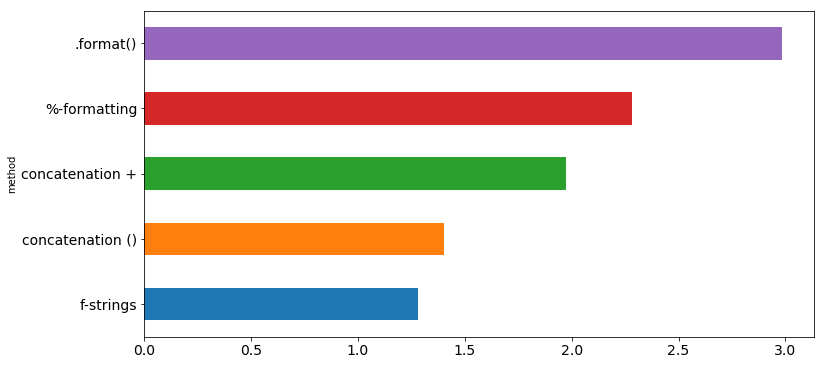

In [13]:
df.sort_values('time').plot(kind='barh', x='method', y='time', figsize=(12, 6), fontsize=14, legend=False)

# Want to work with me?

## GrantMatch is looking for a _Student Co-op -- Junior Software Developer_

### <https://fairtax.ca/careers/junior-software-developer/>

# Thx for you time!


## [mylesb.ca](https://mylesb.ca/) | [me@mylesb.ca](mailto:me@mylesb.ca) | [@mylesb](https://twitter.com/mylesb)